In [38]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


df=pd.read_csv("price_smp.csv")
data2 = np.loadtxt("price_smp.csv",encoding='latin-1', delimiter=',', skiprows=1, usecols=(8, 9, 10), dtype=float)
df.head()

,day,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [39]:
feats= ['day','8','9','10']
df[feats].head()

,day,8,9,10
0,1/01/2021,964.4,964.4,964.4
1,1/02/2021,1019.7,1019.7,1019.7
2,1/03/2021,988.4,988.4,988.4
3,1/04/2021,1002.0,1002.1,1002.1
4,1/05/2021,1061.5,1061.5,1061.5


In [40]:
feats1= ['8','9','10']
df[feats1].head()

,8,9,10
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.1,1002.1
4,1061.5,1061.5,1061.5


In [41]:
feats2= ['8','9']
df[feats2].head()

,8,9
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1002.0,1002.1
4,1061.5,1061.5


In [42]:
feats3= ['10']
df[feats3].head()

,10
0,964.4
1,1019.7
2,988.4
3,1002.1
4,1061.5


In [43]:
# import pandas as pd
# from hmmlearn import hmm  
# import matplotlib.pyplot as plt

# # Giả sử các cột này tồn tại trong DataFrame của bạn
# feats2 = ['8', '9']  # Các cột dữ liệu ma trận chuyển đổi
# feats3 = ['10']      # Cột dữ liệu xác suất khởi đầu và phát ra (nên chứa xác suất)

# # Load dữ liệu từ DataFrame (giả sử giá trị số)
# transition_data = df[feats2].values.astype(float)  # Dữ liệu ma trận chuyển đổi
# print(transition_data.shape)  # Chuyển đổi sang float cho xác suất

# # Sử dụng cột '10' để tính toán xác suất khởi đầu và phát ra
# start_probs = df[feats3].values.astype(float) / sum(df[feats3].values)  # Chuẩn hóa xác suất khởi đầu
# emission_probs = df[feats3].values.astype(float) / sum(df[feats3].values)  # Chuẩn hóa xác suất phát ra

# # Đảm bảo dữ liệu có kích thước chính xác
# if transition_data.shape != (365, 2):
#     raise ValueError("Dữ liệu ma trận chuyển đổi phải có kích thước (5, 2)")
# if start_probs.shape != (365,):
#     raise ValueError("Xác suất khởi đầu phải có kích thước (5,)")
# if emission_probs.shape != (365,):
#     raise ValueError("Xác suất phát ra phải có kích thước (5,)")

# # Tạo mô hình HMM với 2 trạng thái
# model = hmm.MultinomialHMM(n_components=2)  

# # Thiết lập các tham số mô hình
# model.startprob_ = start_probs.reshape(-1, 1)
# model.transmat_ = transition_data
# model.emissionprob_ = emission_probs.reshape(-1, 1)

# # Lấy mẫu từ mô hình
# X, Z = model.sample(365)

# # ... phần còn lại của mã để vẽ biểu đồ ...

# # Định nghĩa ánh xạ màu cho việc vẽ biểu đồ
# state2color = {0: 'yellow', 1: 'grey'}

# def plot_weather_samples(states, state2color):
#     colors = [state2color[state] for state in states]
#     plt.figure(figsize=(15, 2))
#     plt.scatter(range(len(states)), [1] * len(states), c=colors, s=10)
#     plt.show()

# plot_weather_samples(Z, state2color)

# # "Làm phẳng" các mẫu
# samples = [item for sublist in X for item in sublist]

# # Cập nhật ánh xạ state2color cho các giá trị quan sát được
# state2color = {0: 'yellow', 1: 'red', 2: 'blue', 3: 'grey'}

# plot_weather_samples(samples, state2color)


In [47]:
from hmmlearn.hmm import MultinomialHMM

# Khởi tạo HMM với 5 trạng thái và 1000 vòng lặp
model = MultinomialHMM(n_components=5, n_iter=1000)

# Chuyển đổi dữ liệu quan sát sang kiểu số nguyên không âm (nếu cần)
data2 = data2.astype(int)

# Huấn luyện mô hình với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Xác suất khởi đầu: ", model.startprob_)
print("Ma trận chuyển đổi: ", model.transmat_)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Xác suất khởi đầu:  [4.45702623e-083 3.39818374e-198 8.59130223e-001 5.34515700e-017
 1.40869777e-001]
Ma trận chuyển đổi:  [[6.91829103e-077 8.85893334e-186 3.01380896e-005 4.54143245e-018
  9.99969862e-001]
 [3.91148801e-076 0.00000000e+000 9.99813585e-001 1.70592167e-016
  1.86415386e-004]
 [4.12790664e-075 6.59026459e-181 3.12071591e-001 4.15649802e-016
  6.87928409e-001]
 [2.47649972e-072 4.09850095e-185 7.03764734e-001 1.42730851e-015
  2.96235266e-001]
 [8.78387763e-076 4.77480380e-186 9.99999991e-001 1.99894274e-016
  8.66705638e-009]]


In [52]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện với số lần thử khác nhau cho mỗi quan sát
n_samples = 10  # Số lượng quan sát mới cần lấy mẫu
n_trials_per_observation = [1] * n_samples  # Số lần thử cho mỗi quan sát
X, Z = model.sample(n_samples, n_trials=n_trials_per_observation)  # Lấy mẫu mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)


Hidden states:  [2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


TypeError: _AbstractHMM.sample() got an unexpected keyword argument 'n_trials'

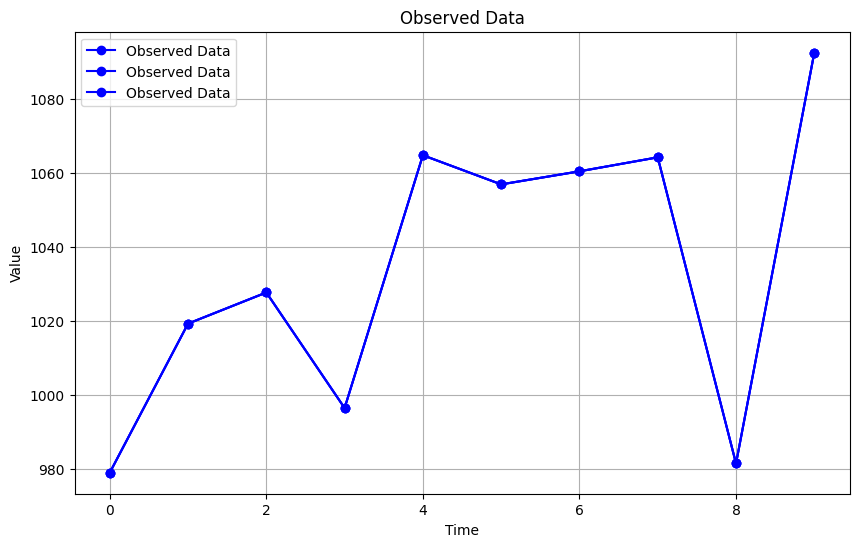

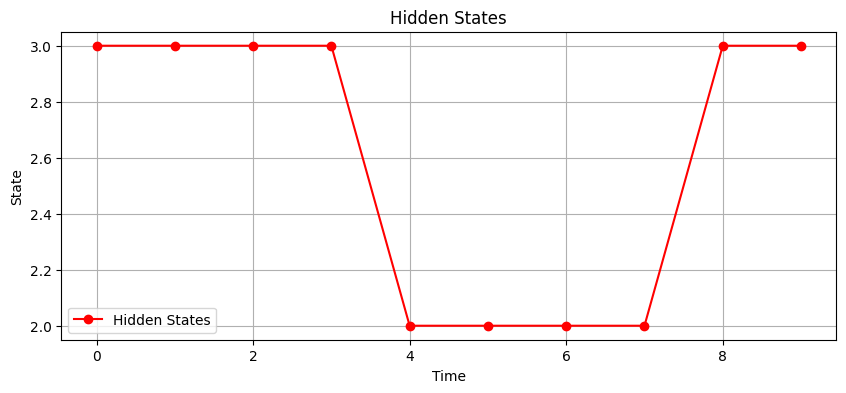

In [53]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho dữ liệu quan sát (X)
plt.figure(figsize=(10, 6))
plt.plot(X, label='Observed Data', marker='o', linestyle='-', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Observed Data')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ cho trạng thái ẩn (Z)
plt.figure(figsize=(10, 4))
plt.plot(Z, label='Hidden States', marker='o', linestyle='-', color='red')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Hidden States')
plt.legend()
plt.grid(True)
plt.show()
